In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(len(cities))

599


In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | isangel
Processing Record 5 of Set 1 | kamenka
Processing Record 6 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | cruzeiro do sul
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | kavieng
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | mumford
Processing Record 16 of Set 1 | opuwo
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | prince rupert
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | geraldton
Processing Record 21 of Set 1 | pisco
Processing Record 22 of S

Processing Record 39 of Set 4 | panaba
Processing Record 40 of Set 4 | souillac
Processing Record 41 of Set 4 | oktyabrskoye
Processing Record 42 of Set 4 | harwich
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | satitoa
City not found. Skipping...
Processing Record 45 of Set 4 | udachnyy
Processing Record 46 of Set 4 | mahebourg
Processing Record 47 of Set 4 | kinablangan
Processing Record 48 of Set 4 | kavali
Processing Record 49 of Set 4 | wexford
Processing Record 50 of Set 4 | bengkulu
Processing Record 1 of Set 5 | zhigansk
Processing Record 2 of Set 5 | mount gambier
Processing Record 3 of Set 5 | husavik
Processing Record 4 of Set 5 | zaltan
Processing Record 5 of Set 5 | osorio
Processing Record 6 of Set 5 | yar-sale
Processing Record 7 of Set 5 | esperance
Processing Record 8 of Set 5 | bonavista
Processing Record 9 of Set 5 | doctor pedro p. pena
City not found. Skipping...
Processing Record 10 of Set 5 | leningradskiy
Proce

Processing Record 28 of Set 8 | hildburghausen
Processing Record 29 of Set 8 | bonthe
Processing Record 30 of Set 8 | ulaanbaatar
Processing Record 31 of Set 8 | inhambane
Processing Record 32 of Set 8 | yantal
Processing Record 33 of Set 8 | halalo
City not found. Skipping...
Processing Record 34 of Set 8 | clemson
Processing Record 35 of Set 8 | saint-raphael
Processing Record 36 of Set 8 | senneterre
Processing Record 37 of Set 8 | altay
Processing Record 38 of Set 8 | rucheng
Processing Record 39 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 40 of Set 8 | sinnamary
Processing Record 41 of Set 8 | concepcion del uruguay
Processing Record 42 of Set 8 | ilulissat
Processing Record 43 of Set 8 | svetlogorsk
Processing Record 44 of Set 8 | charlottesville
Processing Record 45 of Set 8 | zhezkazgan
Processing Record 46 of Set 8 | ayan
Processing Record 47 of Set 8 | bowen
Processing Record 48 of Set 8 | lorengau
Processing Record 49 of Set 8 | orlik
Processing Record 

Processing Record 18 of Set 12 | eagle
Processing Record 19 of Set 12 | monroe
Processing Record 20 of Set 12 | bustamante
Processing Record 21 of Set 12 | otradnoye
Processing Record 22 of Set 12 | constitucion
Processing Record 23 of Set 12 | scarborough
Processing Record 24 of Set 12 | tutoia
Processing Record 25 of Set 12 | jumla
Processing Record 26 of Set 12 | erzin
Processing Record 27 of Set 12 | port-gentil
Processing Record 28 of Set 12 | ukiah
Processing Record 29 of Set 12 | baherden
Processing Record 30 of Set 12 | taburi
City not found. Skipping...
Processing Record 31 of Set 12 | balkhash
Processing Record 32 of Set 12 | aklavik
Processing Record 33 of Set 12 | solnechnyy
Processing Record 34 of Set 12 | booue
Processing Record 35 of Set 12 | herat
Processing Record 36 of Set 12 | namatanai
Processing Record 37 of Set 12 | conchas
Processing Record 38 of Set 12 | hambantota
Processing Record 39 of Set 12 | hailar
Processing Record 40 of Set 12 | turayf
Processing Record 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,64.89,75,98,8.55,ZA,2021-09-25 17:16:17
1,Ushuaia,-54.8000,-68.3000,44.26,61,40,13.80,AR,2021-09-25 17:16:17
2,Cherskiy,68.7500,161.3000,30.61,98,100,12.24,RU,2021-09-25 17:12:08
3,Isangel,-19.5500,169.2667,68.27,80,85,9.33,VU,2021-09-25 17:16:17
4,Kamenka,51.3223,42.7678,48.15,81,59,5.35,RU,2021-09-25 17:16:18
5,Cruzeiro Do Sul,-29.5128,-51.9853,73.49,70,33,2.62,BR,2021-09-25 17:16:18
6,Rikitea,-23.1203,-134.9692,74.32,73,43,16.67,PF,2021-09-25 17:16:18
7,Clyde River,70.4692,-68.5914,32.23,80,75,0.00,CA,2021-09-25 17:16:18
8,New Norfolk,-42.7826,147.0587,40.50,75,17,3.33,AU,2021-09-25 17:16:19
9,Kavieng,-2.5744,150.7967,82.29,77,27,16.73,PG,2021-09-25 17:16:19


In [11]:
reorder_city_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[reorder_city_data]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2021-09-25 17:16:17,-33.5906,26.8910,64.89,75,98,8.55
1,Ushuaia,AR,2021-09-25 17:16:17,-54.8000,-68.3000,44.26,61,40,13.80
2,Cherskiy,RU,2021-09-25 17:12:08,68.7500,161.3000,30.61,98,100,12.24
3,Isangel,VU,2021-09-25 17:16:17,-19.5500,169.2667,68.27,80,85,9.33
4,Kamenka,RU,2021-09-25 17:16:18,51.3223,42.7678,48.15,81,59,5.35
5,Cruzeiro Do Sul,BR,2021-09-25 17:16:18,-29.5128,-51.9853,73.49,70,33,2.62
6,Rikitea,PF,2021-09-25 17:16:18,-23.1203,-134.9692,74.32,73,43,16.67
7,Clyde River,CA,2021-09-25 17:16:18,70.4692,-68.5914,32.23,80,75,0.00
8,New Norfolk,AU,2021-09-25 17:16:19,-42.7826,147.0587,40.50,75,17,3.33
9,Kavieng,PG,2021-09-25 17:16:19,-2.5744,150.7967,82.29,77,27,16.73


In [12]:
# Create the output file (CSV).
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

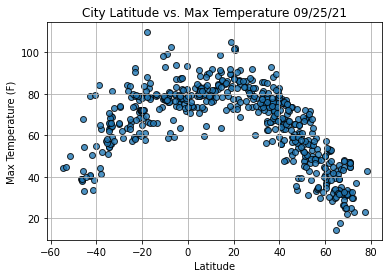

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

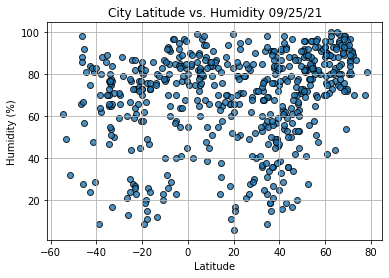

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

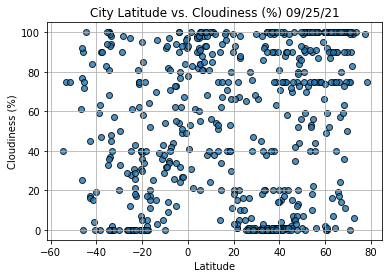

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

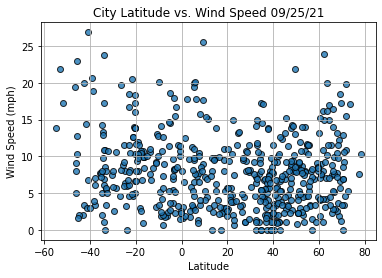

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()